# Product Recommendation System - Data Analysis

This notebook provides comprehensive exploratory data analysis (EDA) for the product recommendation system.

## Table of Contents
1. Data Loading & Overview
2. User Analysis (Loyal vs New Customers)
3. Product Analysis
4. Transaction Patterns
5. Price Distribution Analysis
6. Co-purchase Analysis
7. Temporal Analysis
8. Sparsity Analysis
9. Recommendations for Model Selection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from itertools import combinations
import warnings

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

print('Libraries loaded successfully!')

Libraries loaded successfully!


## 1. Data Loading & Overview

In [2]:
# Load the data
xlsx = pd.ExcelFile('../data/Data Science - Assignment.xlsx')
print(f'Available sheets: {xlsx.sheet_names}')

# Load both datasets
loyal_df = pd.read_excel(xlsx, sheet_name='Loyal Customers')
new_df = pd.read_excel(xlsx, sheet_name='New Customers')

# Standardize column names
loyal_df.columns = ['pos_number', 'ticket_number', 'ticket_datetime', 'ticket_amount', 
                    'user_id', 'item_id', 'units_sold', 'item_price']
new_df.columns = ['ticket_number', 'pos_number', 'ticket_datetime', 'ticket_amount', 
                  'user_id', 'item_id', 'units_sold', 'item_price']

# Convert item_id to string for consistency
loyal_df['item_id'] = loyal_df['item_id'].astype(str)
new_df['item_id'] = new_df['item_id'].astype(str)

print(f'\nLoyal Customers Dataset: {loyal_df.shape}')
print(f'New Customers Dataset: {new_df.shape}')

Available sheets: ['Loyal Customers', 'New Customers']

Loyal Customers Dataset: (74164, 8)
New Customers Dataset: (3628, 8)


In [3]:
# Display dataset info
print('=== LOYAL CUSTOMERS ===')
print(loyal_df.info())
print('\nFirst 5 rows:')
display(loyal_df.head())

print('\n=== NEW CUSTOMERS ===')
print(new_df.info())
print('\nFirst 5 rows:')
display(new_df.head())

=== LOYAL CUSTOMERS ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74164 entries, 0 to 74163
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pos_number       74164 non-null  int64         
 1   ticket_number    74164 non-null  int64         
 2   ticket_datetime  74164 non-null  datetime64[ns]
 3   ticket_amount    74164 non-null  float64       
 4   user_id          74164 non-null  int64         
 5   item_id          74164 non-null  object        
 6   units_sold       74164 non-null  int64         
 7   item_price       74164 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(1)
memory usage: 4.5+ MB
None

First 5 rows:


,pos_number,ticket_number,ticket_datetime,ticket_amount,user_id,item_id,units_sold,item_price
0,1,19,2025-11-29 09:13:00,73.0,41786230378,7003858505,2,1.99
1,1,19,2025-11-29 09:13:00,73.0,41786230378,150,3,1.99
2,1,19,2025-11-29 09:13:00,73.0,41786230378,7003864375,1,2.45
3,1,19,2025-11-29 09:13:00,73.0,41786230378,1590006105,1,4.88
4,1,19,2025-11-29 09:13:00,73.0,41786230378,1590006000,1,4.88



=== NEW CUSTOMERS ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3628 entries, 0 to 3627
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ticket_number    3628 non-null   int64         
 1   pos_number       3628 non-null   int64         
 2   ticket_datetime  3628 non-null   datetime64[ns]
 3   ticket_amount    3628 non-null   float64       
 4   user_id          3628 non-null   int64         
 5   item_id          3628 non-null   object        
 6   units_sold       3628 non-null   int64         
 7   item_price       3628 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(1)
memory usage: 226.9+ KB
None

First 5 rows:


,ticket_number,pos_number,ticket_datetime,ticket_amount,user_id,item_id,units_sold,item_price
0,155,1,2025-12-16 12:47:00,108.28,41859244564,7294560133,1,3.29
1,155,1,2025-12-16 12:47:00,108.28,41859244564,2840051779,1,7.29
2,155,1,2025-12-16 12:47:00,108.28,41859244564,1200000017,1,10.99
3,155,1,2025-12-16 12:47:00,108.28,41859244564,7206000111,3,2.39
4,155,1,2025-12-16 12:47:00,108.28,41859244564,7206000813,3,3.19


In [4]:
# Summary statistics
def generate_summary(df, name):
    summary = {
        'Dataset': name,
        'Total Transactions': len(df),
        'Unique Users': df['user_id'].nunique(),
        'Unique Items': df['item_id'].nunique(),
        'Unique Tickets': df['ticket_number'].nunique(),
        'Date Range Start': df['ticket_datetime'].min(),
        'Date Range End': df['ticket_datetime'].max(),
        'Avg Items per User': len(df) / df['user_id'].nunique(),
        'Avg Items per Ticket': len(df) / df['ticket_number'].nunique(),
        'Price Min': df['item_price'].min(),
        'Price Max': df['item_price'].max(),
        'Price Mean': df['item_price'].mean(),
        'Null Values': df.isnull().sum().sum()
    }
    return summary

summary_df = pd.DataFrame([generate_summary(loyal_df, 'Loyal'), generate_summary(new_df, 'New')])
display(summary_df.T)

,0,1
Dataset,Loyal,New
Total Transactions,74164,3628
Unique Users,70,50
Unique Items,10148,1997
Unique Tickets,680,121
Date Range Start,2024-07-01 07:54:00,2025-12-01 09:33:00
Date Range End,2026-01-03 19:39:00,2025-12-31 15:53:00
Avg Items per User,1059.485714,72.56
Avg Items per Ticket,109.064706,29.983471
Price Min,0.0,0.0


## 2. User Analysis

In [5]:
# User purchase frequency for loyal customers
loyal_user_stats = loyal_df.groupby('user_id').agg({
    'item_id': 'count',
    'ticket_number': 'nunique',
    'item_price': ['sum', 'mean'],
    'units_sold': 'sum'
}).round(2)
loyal_user_stats.columns = ['total_items', 'num_transactions', 'total_spent', 'avg_item_price', 'total_units']
loyal_user_stats = loyal_user_stats.sort_values('total_items', ascending=False)

print('Top 10 Loyal Customers by Purchase Volume:')
display(loyal_user_stats.head(10))

print(f'\nLoyal User Statistics:')
print(loyal_user_stats.describe())

Top 10 Loyal Customers by Purchase Volume:


,total_items,num_transactions,total_spent,avg_item_price,total_units
user_id,,,,,
41456069174,7579,266,31275.05,4.13,9469
41126839657,3710,190,16260.62,4.38,4635
41416221680,3043,290,14480.60,4.76,4068
41706774086,2967,211,12837.61,4.33,3434
41259840571,2120,189,8071.32,3.81,2380
41822888993,1874,259,6988.53,3.73,2597
41521615027,1840,222,7940.16,4.32,2436
41168518931,1837,114,7951.01,4.33,2504
41527877334,1833,194,7081.12,3.86,2212



Loyal User Statistics:
       total_items  num_transactions   total_spent  avg_item_price  \
count    70.000000         70.000000     70.000000       70.000000   
mean   1059.485714        130.900000   4415.428000        4.065143   
std    1057.454844         69.919861   4517.670923        0.560850   
min     127.000000         32.000000    437.570000        2.640000   
25%     473.250000         74.000000   1881.312500        3.720000   
50%     818.000000        106.500000   3144.980000        4.105000   
75%    1310.750000        186.000000   5534.157500        4.352500   
max    7579.000000        290.000000  31275.050000        5.960000   

       total_units  
count    70.000000  
mean   1365.742857  
std    1343.262767  
min     129.000000  
25%     589.250000  
50%    1116.000000  
75%    1757.000000  
max    9469.000000  


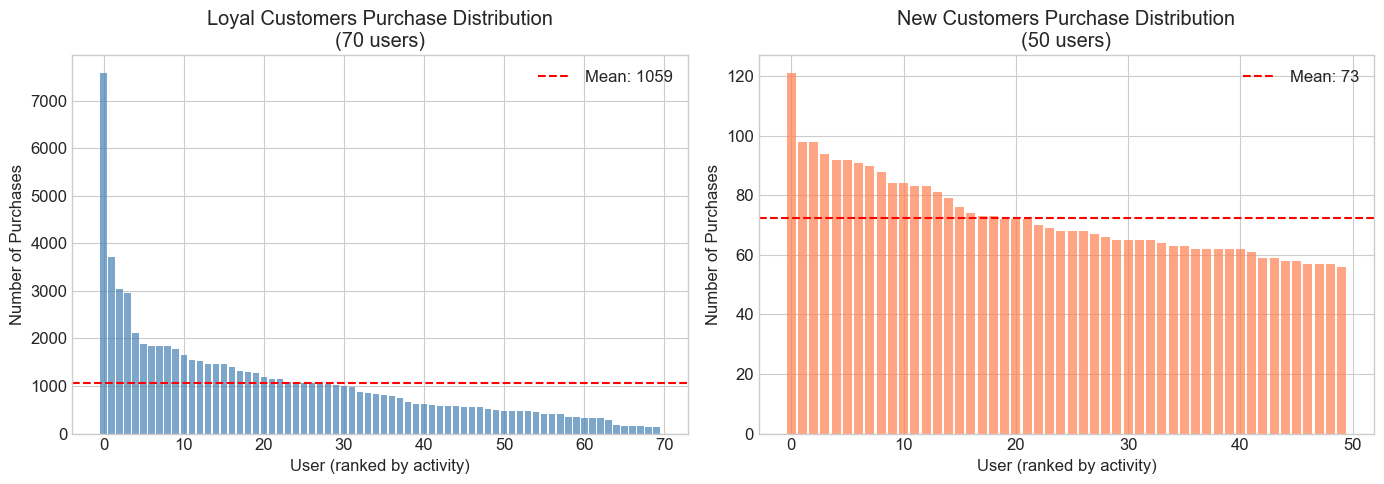

In [6]:
# Visualize user purchase distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Loyal customers
loyal_user_counts = loyal_df.groupby('user_id').size().sort_values(ascending=False)
axes[0].bar(range(len(loyal_user_counts)), loyal_user_counts.values, color='steelblue', alpha=0.7)
axes[0].set_xlabel('User (ranked by activity)')
axes[0].set_ylabel('Number of Purchases')
axes[0].set_title(f'Loyal Customers Purchase Distribution\n({len(loyal_user_counts)} users)')
axes[0].axhline(y=loyal_user_counts.mean(), color='red', linestyle='--', label=f'Mean: {loyal_user_counts.mean():.0f}')
axes[0].legend()

# New customers
new_user_counts = new_df.groupby('user_id').size().sort_values(ascending=False)
axes[1].bar(range(len(new_user_counts)), new_user_counts.values, color='coral', alpha=0.7)
axes[1].set_xlabel('User (ranked by activity)')
axes[1].set_ylabel('Number of Purchases')
axes[1].set_title(f'New Customers Purchase Distribution\n({len(new_user_counts)} users)')
axes[1].axhline(y=new_user_counts.mean(), color='red', linestyle='--', label=f'Mean: {new_user_counts.mean():.0f}')
axes[1].legend()

plt.tight_layout()
plt.show()

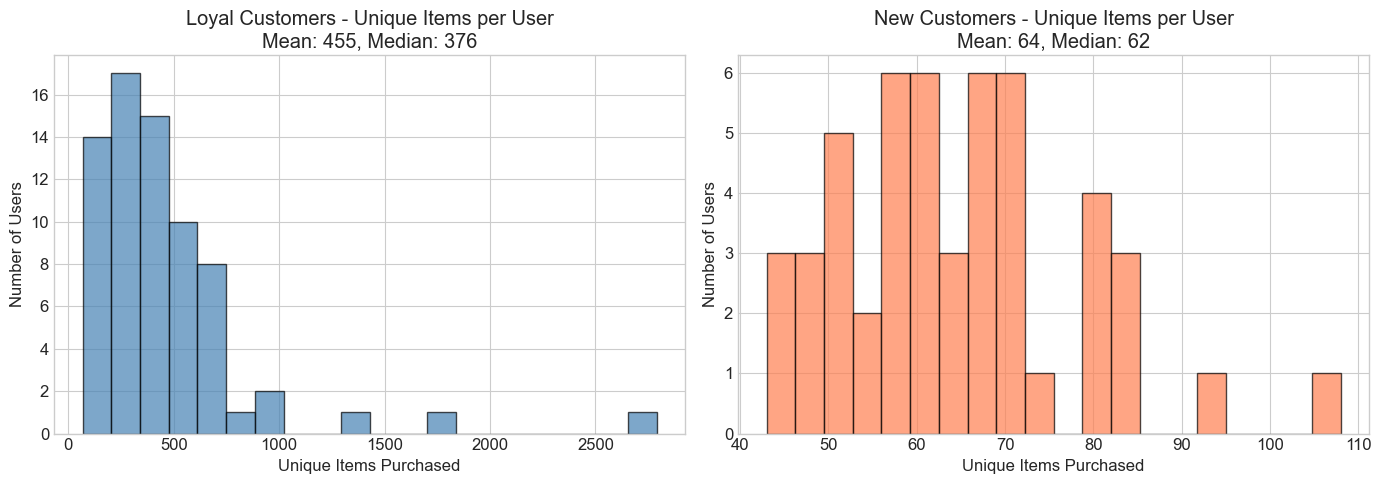

In [7]:
# User diversity - How many unique items does each user buy?
loyal_user_diversity = loyal_df.groupby('user_id')['item_id'].nunique().sort_values(ascending=False)
new_user_diversity = new_df.groupby('user_id')['item_id'].nunique().sort_values(ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(loyal_user_diversity, bins=20, color='steelblue', alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Unique Items Purchased')
axes[0].set_ylabel('Number of Users')
axes[0].set_title(f'Loyal Customers - Unique Items per User\nMean: {loyal_user_diversity.mean():.0f}, Median: {loyal_user_diversity.median():.0f}')

axes[1].hist(new_user_diversity, bins=20, color='coral', alpha=0.7, edgecolor='black')
axes[1].set_xlabel('Unique Items Purchased')
axes[1].set_ylabel('Number of Users')
axes[1].set_title(f'New Customers - Unique Items per User\nMean: {new_user_diversity.mean():.0f}, Median: {new_user_diversity.median():.0f}')

plt.tight_layout()
plt.show()

## 3. Product Analysis

In [8]:
# Item popularity distribution for loyal customers
loyal_item_popularity = loyal_df.groupby('item_id').agg({
    'user_id': 'nunique',
    'ticket_number': 'count',
    'units_sold': 'sum',
    'item_price': 'mean'
}).round(2)
loyal_item_popularity.columns = ['unique_buyers', 'purchase_count', 'total_units', 'avg_price']
loyal_item_popularity = loyal_item_popularity.sort_values('purchase_count', ascending=False)

print('Top 20 Most Popular Items (Loyal Customers):')
display(loyal_item_popularity.head(20))

Top 20 Most Popular Items (Loyal Customers):


,unique_buyers,purchase_count,total_units,avg_price
item_id,,,,
200,70,3421,4772,0.00
4011,60,872,880,0.74
7206000117,58,834,924,4.00
OPEN DEPT 101,60,560,1141,0.00
7206000717,49,450,483,3.86
20098100000,52,358,947,27.28
7800008240,31,355,372,2.32
20098900000,52,347,746,25.01
7294560153,48,321,397,2.77


2619 items (25.8%) account for 80% of purchases


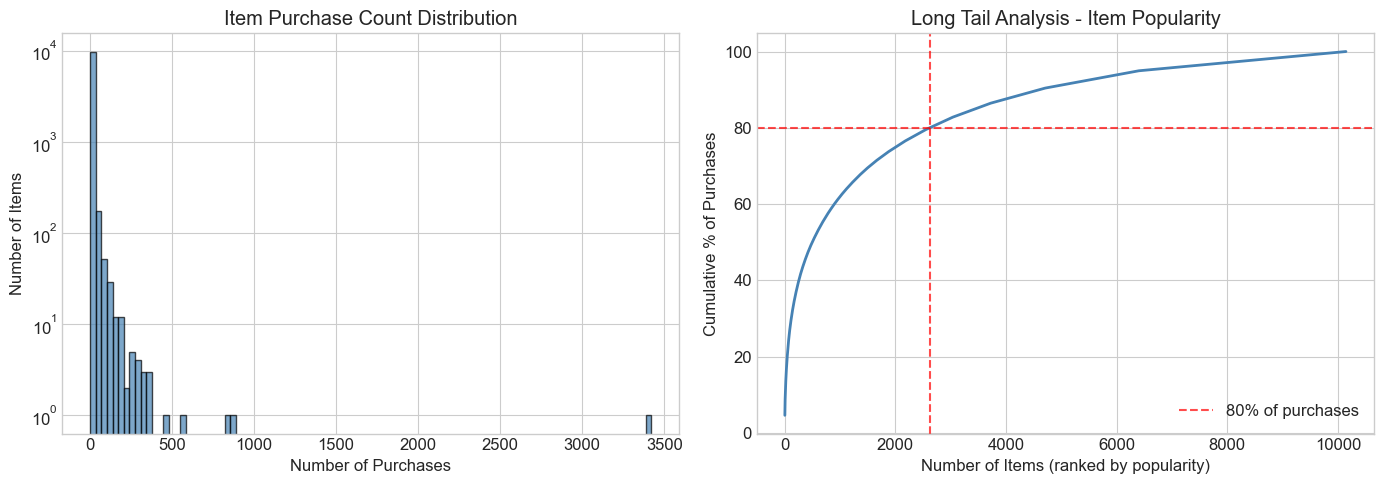

In [9]:
# Long-tail distribution visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Purchase count distribution (log scale)
item_counts = loyal_item_popularity['purchase_count'].values
axes[0].hist(item_counts, bins=100, color='steelblue', alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Number of Purchases')
axes[0].set_ylabel('Number of Items')
axes[0].set_title('Item Purchase Count Distribution')
axes[0].set_yscale('log')

# Cumulative distribution
sorted_counts = np.sort(item_counts)[::-1]
cumsum = np.cumsum(sorted_counts) / np.sum(sorted_counts)
axes[1].plot(range(len(cumsum)), cumsum * 100, color='steelblue', linewidth=2)
axes[1].axhline(y=80, color='red', linestyle='--', alpha=0.7, label='80% of purchases')
axes[1].axvline(x=np.searchsorted(cumsum, 0.8), color='red', linestyle='--', alpha=0.7)
axes[1].set_xlabel('Number of Items (ranked by popularity)')
axes[1].set_ylabel('Cumulative % of Purchases')
axes[1].set_title('Long Tail Analysis - Item Popularity')
axes[1].legend()

items_for_80 = np.searchsorted(cumsum, 0.8)
print(f'{items_for_80} items ({items_for_80/len(item_counts)*100:.1f}%) account for 80% of purchases')

plt.tight_layout()
plt.show()

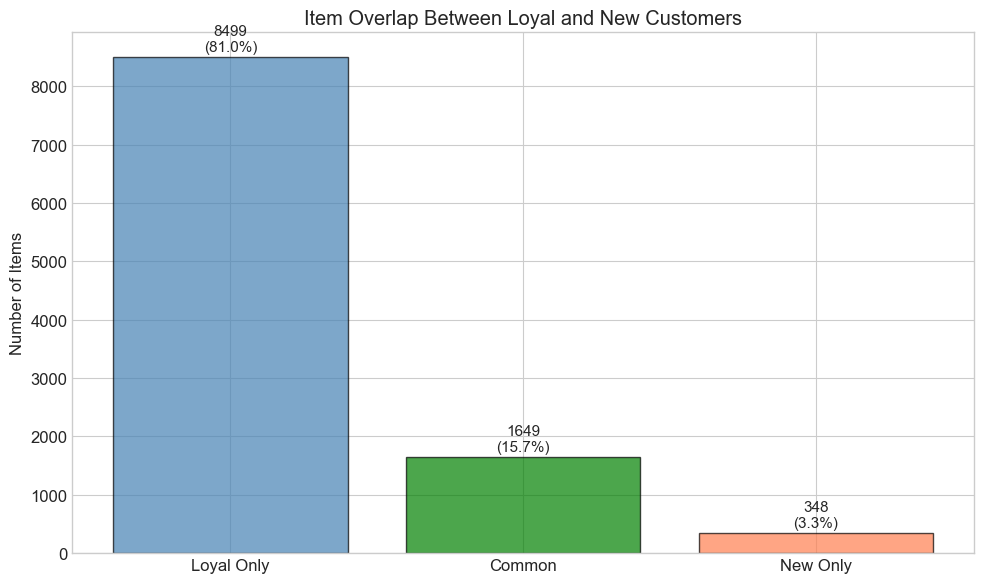

Total unique items in loyal: 10148
Total unique items in new: 1997
Common items: 1649 (82.6% of new customer items)


In [10]:
# Item overlap analysis
loyal_items = set(loyal_df['item_id'].unique())
new_items = set(new_df['item_id'].unique())

common_items = loyal_items.intersection(new_items)
loyal_only = loyal_items - new_items
new_only = new_items - loyal_items

# Venn diagram data
fig, ax = plt.subplots(figsize=(10, 6))

from matplotlib.patches import Circle
from matplotlib.collections import PatchCollection

# Simple representation
categories = ['Loyal Only', 'Common', 'New Only']
values = [len(loyal_only), len(common_items), len(new_only)]
colors = ['steelblue', 'green', 'coral']

bars = ax.bar(categories, values, color=colors, alpha=0.7, edgecolor='black')
ax.set_ylabel('Number of Items')
ax.set_title('Item Overlap Between Loyal and New Customers')

for bar, val in zip(bars, values):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50, 
            f'{val}\n({val/len(loyal_items.union(new_items))*100:.1f}%)', 
            ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

print(f'Total unique items in loyal: {len(loyal_items)}')
print(f'Total unique items in new: {len(new_items)}')
print(f'Common items: {len(common_items)} ({len(common_items)/len(new_items)*100:.1f}% of new customer items)')

## 4. Transaction Patterns

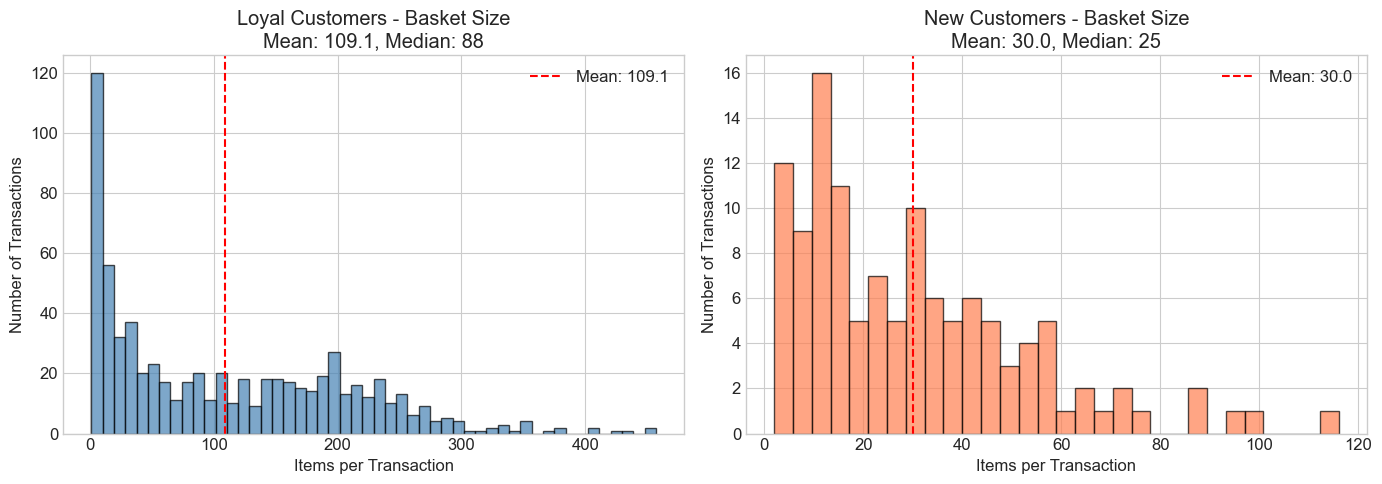

In [11]:
# Basket analysis - items per transaction
loyal_basket_size = loyal_df.groupby('ticket_number').size()
new_basket_size = new_df.groupby('ticket_number').size()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(loyal_basket_size, bins=50, color='steelblue', alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Items per Transaction')
axes[0].set_ylabel('Number of Transactions')
axes[0].set_title(f'Loyal Customers - Basket Size\nMean: {loyal_basket_size.mean():.1f}, Median: {loyal_basket_size.median():.0f}')
axes[0].axvline(x=loyal_basket_size.mean(), color='red', linestyle='--', label=f'Mean: {loyal_basket_size.mean():.1f}')
axes[0].legend()

axes[1].hist(new_basket_size, bins=30, color='coral', alpha=0.7, edgecolor='black')
axes[1].set_xlabel('Items per Transaction')
axes[1].set_ylabel('Number of Transactions')
axes[1].set_title(f'New Customers - Basket Size\nMean: {new_basket_size.mean():.1f}, Median: {new_basket_size.median():.0f}')
axes[1].axvline(x=new_basket_size.mean(), color='red', linestyle='--', label=f'Mean: {new_basket_size.mean():.1f}')
axes[1].legend()

plt.tight_layout()
plt.show()

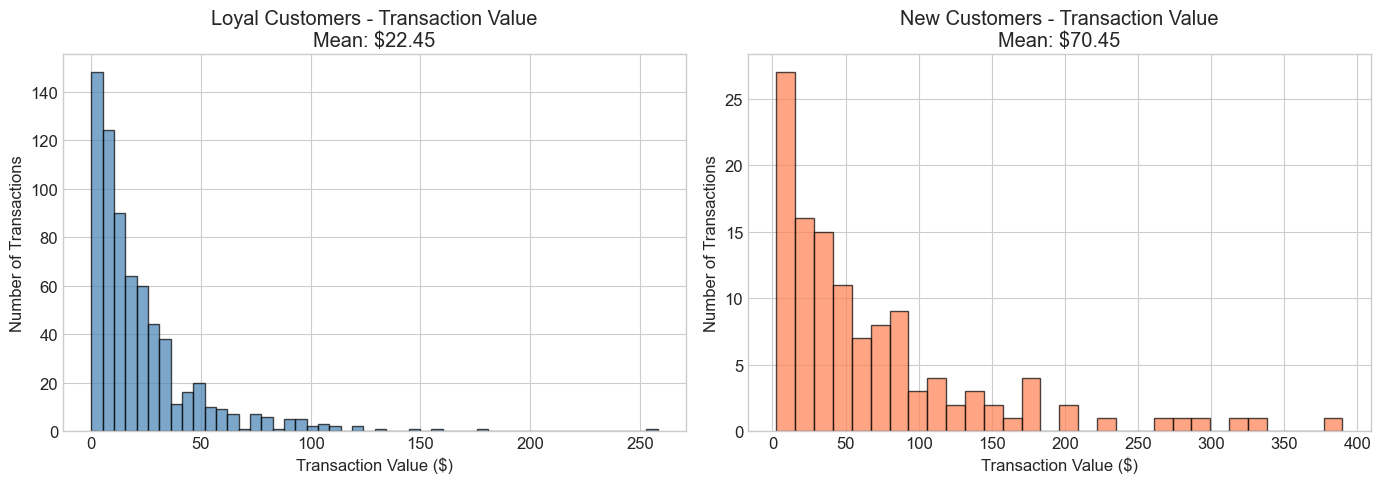

In [12]:
# Transaction value distribution
loyal_ticket_values = loyal_df.groupby('ticket_number')['ticket_amount'].first()
new_ticket_values = new_df.groupby('ticket_number')['ticket_amount'].first()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(loyal_ticket_values, bins=50, color='steelblue', alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Transaction Value ($)')
axes[0].set_ylabel('Number of Transactions')
axes[0].set_title(f'Loyal Customers - Transaction Value\nMean: ${loyal_ticket_values.mean():.2f}')

axes[1].hist(new_ticket_values, bins=30, color='coral', alpha=0.7, edgecolor='black')
axes[1].set_xlabel('Transaction Value ($)')
axes[1].set_ylabel('Number of Transactions')
axes[1].set_title(f'New Customers - Transaction Value\nMean: ${new_ticket_values.mean():.2f}')

plt.tight_layout()
plt.show()

## 5. Price Distribution Analysis

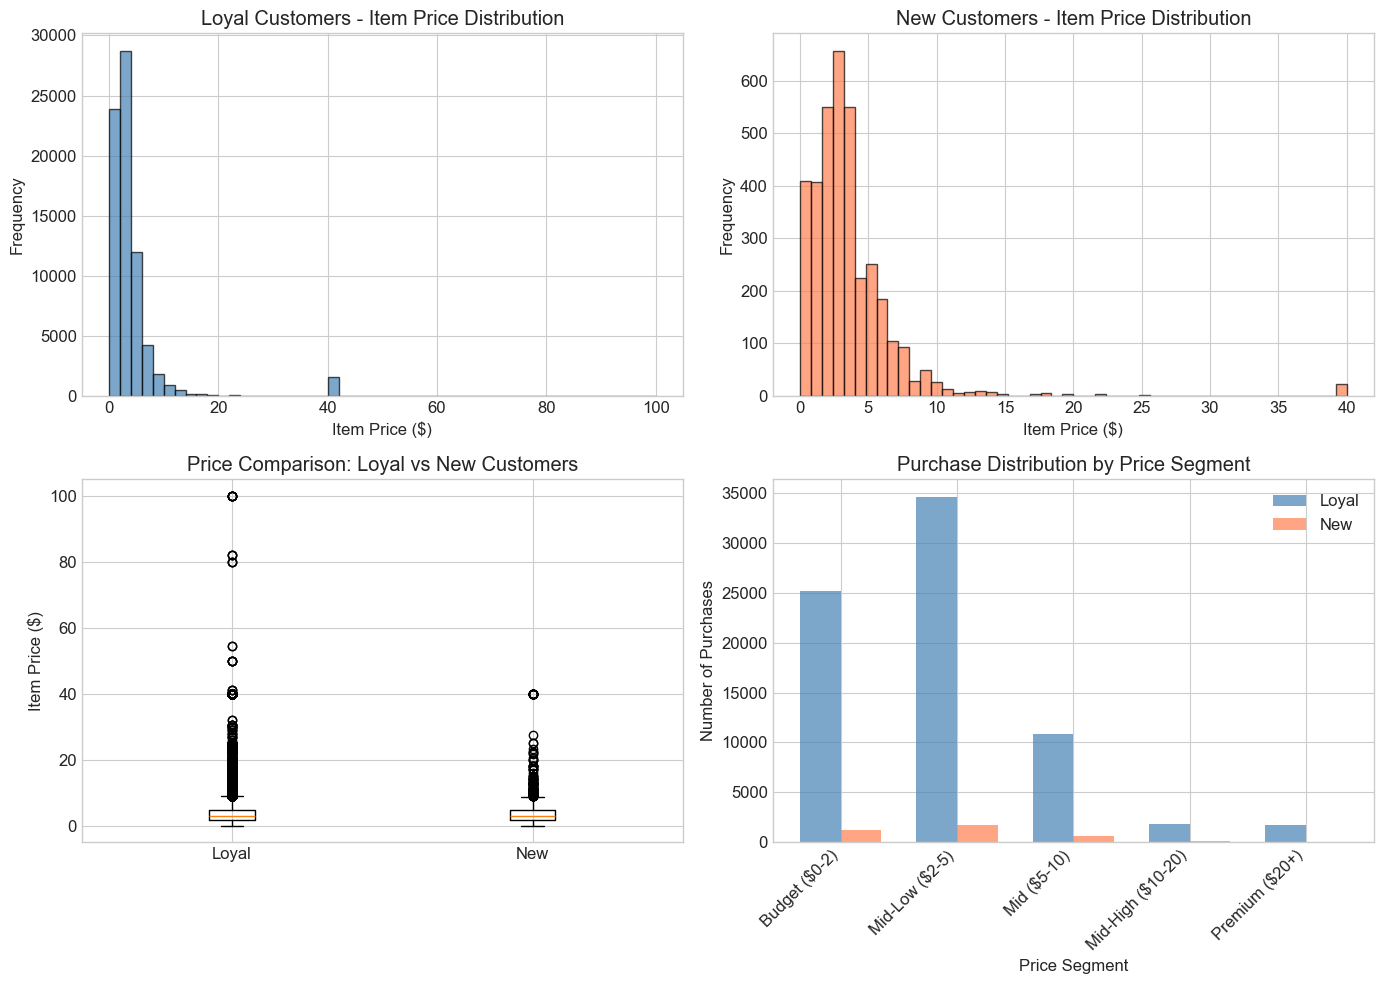

In [13]:
# Price distribution
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Loyal customers price histogram
axes[0, 0].hist(loyal_df['item_price'], bins=50, color='steelblue', alpha=0.7, edgecolor='black')
axes[0, 0].set_xlabel('Item Price ($)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Loyal Customers - Item Price Distribution')

# New customers price histogram
axes[0, 1].hist(new_df['item_price'], bins=50, color='coral', alpha=0.7, edgecolor='black')
axes[0, 1].set_xlabel('Item Price ($)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('New Customers - Item Price Distribution')

# Box plots
axes[1, 0].boxplot([loyal_df['item_price'], new_df['item_price']], labels=['Loyal', 'New'])
axes[1, 0].set_ylabel('Item Price ($)')
axes[1, 0].set_title('Price Comparison: Loyal vs New Customers')

# Price segments
def get_price_segment(price):
    if price <= 2:
        return 'Budget ($0-2)'
    elif price <= 5:
        return 'Mid-Low ($2-5)'
    elif price <= 10:
        return 'Mid ($5-10)'
    elif price <= 20:
        return 'Mid-High ($10-20)'
    else:
        return 'Premium ($20+)'

loyal_segments = loyal_df['item_price'].apply(get_price_segment).value_counts()
new_segments = new_df['item_price'].apply(get_price_segment).value_counts()

segments_order = ['Budget ($0-2)', 'Mid-Low ($2-5)', 'Mid ($5-10)', 'Mid-High ($10-20)', 'Premium ($20+)']
x = np.arange(len(segments_order))
width = 0.35

loyal_vals = [loyal_segments.get(s, 0) for s in segments_order]
new_vals = [new_segments.get(s, 0) for s in segments_order]

axes[1, 1].bar(x - width/2, loyal_vals, width, label='Loyal', color='steelblue', alpha=0.7)
axes[1, 1].bar(x + width/2, new_vals, width, label='New', color='coral', alpha=0.7)
axes[1, 1].set_xlabel('Price Segment')
axes[1, 1].set_ylabel('Number of Purchases')
axes[1, 1].set_title('Purchase Distribution by Price Segment')
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(segments_order, rotation=45, ha='right')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

In [14]:
# Price statistics by segment
print('Price Statistics:')
print('\nLoyal Customers:')
print(loyal_df['item_price'].describe())
print('\nNew Customers:')
print(new_df['item_price'].describe())

Price Statistics:

Loyal Customers:
count    74164.000000
mean         4.167520
std          6.032016
min          0.000000
25%          1.690000
50%          2.980000
75%          4.590000
max        100.000000
Name: item_price, dtype: float64

New Customers:
count    3628.000000
mean        3.682660
std         3.923534
min         0.000000
25%         1.790000
50%         2.990000
75%         4.590000
max        40.000000
Name: item_price, dtype: float64


## 6. Co-purchase Analysis

In [15]:
# Find frequently co-purchased items (items bought in the same transaction)
def get_copurchase_pairs(df, sample_size=10000):
    """Get co-purchase pairs from transactions"""
    copurchase_counts = Counter()
    
    # Group by ticket to get baskets
    baskets = df.groupby('ticket_number')['item_id'].apply(list)
    
    for basket in baskets:
        if len(basket) > 1 and len(basket) <= 50:  # Skip very large baskets
            # Get all pairs
            for pair in combinations(sorted(set(basket)), 2):
                copurchase_counts[pair] += 1
    
    return copurchase_counts

print('Analyzing co-purchase patterns for loyal customers...')
loyal_copurchases = get_copurchase_pairs(loyal_df)

print(f'\nTop 20 Co-purchased Item Pairs:')
for (item1, item2), count in loyal_copurchases.most_common(20):
    print(f'  {item1} + {item2}: {count} times')

Analyzing co-purchase patterns for loyal customers...

Top 20 Co-purchased Item Pairs:
  200 + 7206000117: 54 times
  200 + 4011: 48 times
  200 + 7206000717: 43 times
  200 + 7189903720: 37 times
  200 + 7800008240: 29 times
  4011 + 7206000117: 23 times
  200 + 20000500000: 21 times
  200 + 7189983548: 20 times
  200 + 20098100000: 20 times
  200 + 9147504189: 19 times
  200 + 7003837280: 17 times
  7206000117 + 7800008240: 17 times
  4011 + 7206000717: 17 times
  200 + OPEN DEPT 101: 16 times
  200 + 7206000111: 14 times
  20000500000 + 4011: 14 times
  4011 + 7800008240: 14 times
  200 + 2754100123: 14 times
  200 + 20000900000: 13 times
  7189903720 + 7206000117: 13 times


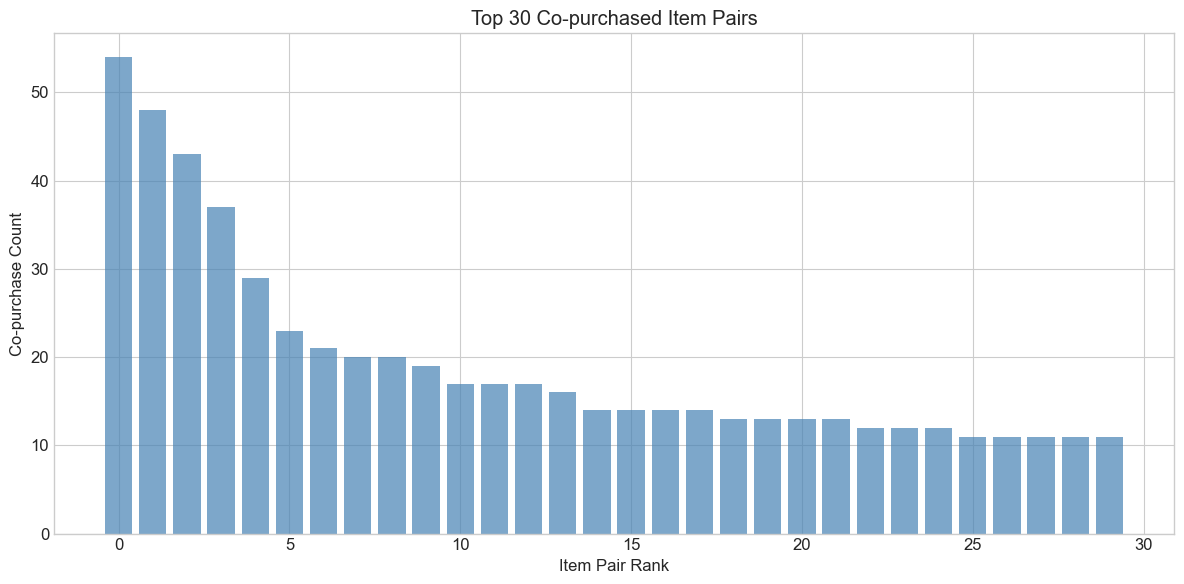

In [16]:
# Visualize co-purchase network (top pairs)
top_pairs = loyal_copurchases.most_common(30)
pair_counts = [count for _, count in top_pairs]

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(range(len(pair_counts)), pair_counts, color='steelblue', alpha=0.7)
ax.set_xlabel('Item Pair Rank')
ax.set_ylabel('Co-purchase Count')
ax.set_title('Top 30 Co-purchased Item Pairs')
plt.tight_layout()
plt.show()

## 7. Temporal Analysis

In [17]:
# Extract time features
loyal_df['date'] = loyal_df['ticket_datetime'].dt.date
loyal_df['hour'] = loyal_df['ticket_datetime'].dt.hour
loyal_df['day_of_week'] = loyal_df['ticket_datetime'].dt.day_name()
loyal_df['month'] = loyal_df['ticket_datetime'].dt.to_period('M')

new_df['date'] = new_df['ticket_datetime'].dt.date
new_df['hour'] = new_df['ticket_datetime'].dt.hour
new_df['day_of_week'] = new_df['ticket_datetime'].dt.day_name()
new_df['month'] = new_df['ticket_datetime'].dt.to_period('M')

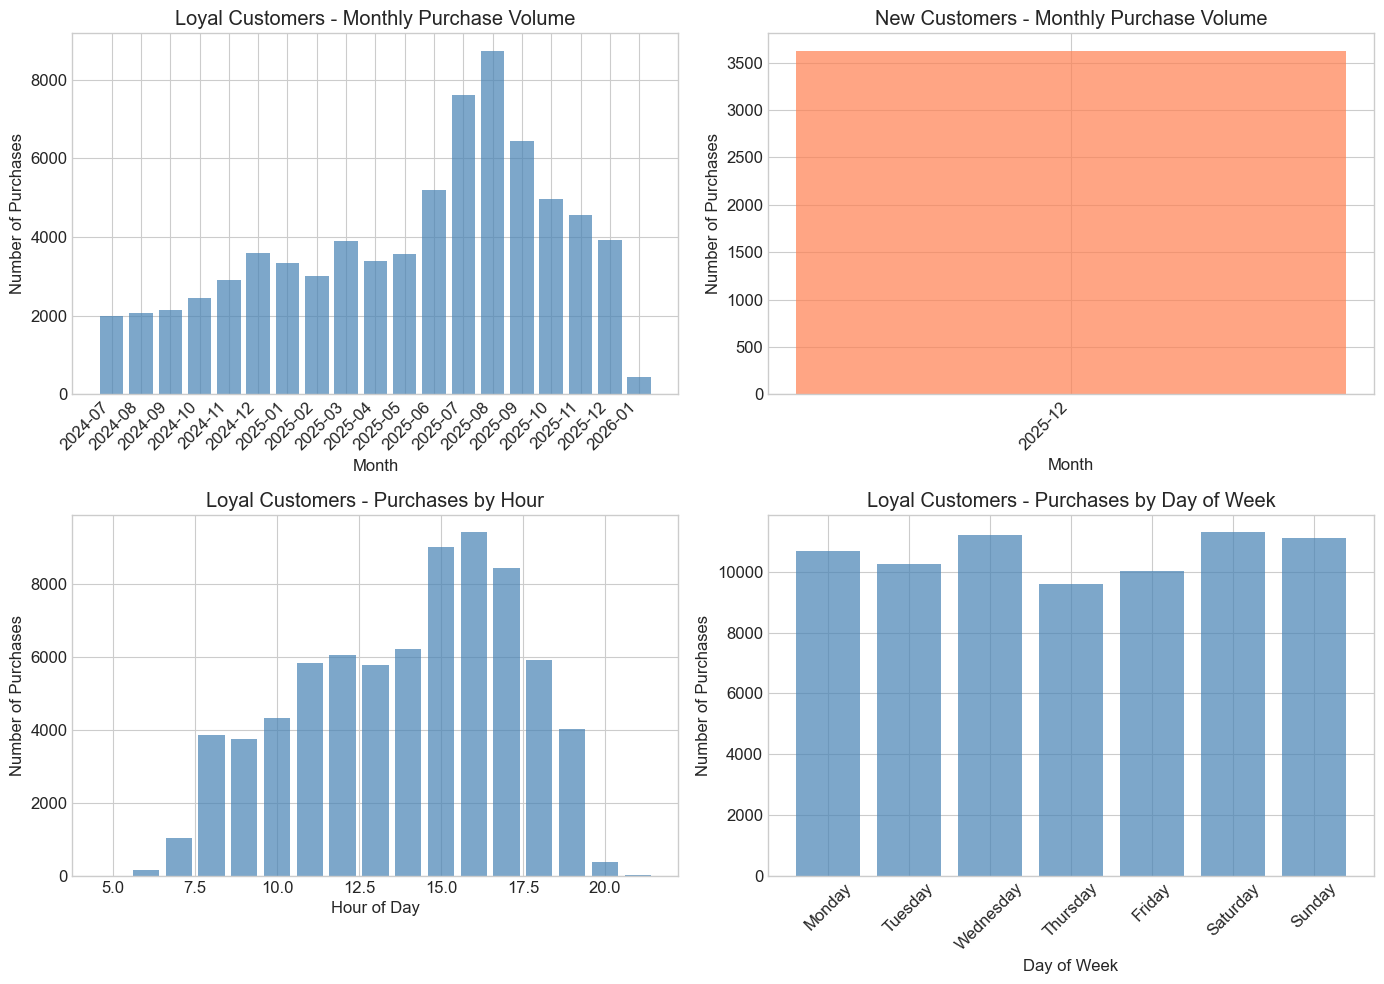

In [18]:
# Purchases by month
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Monthly purchases - Loyal
loyal_monthly = loyal_df.groupby('month').size()
axes[0, 0].bar(range(len(loyal_monthly)), loyal_monthly.values, color='steelblue', alpha=0.7)
axes[0, 0].set_xticks(range(len(loyal_monthly)))
axes[0, 0].set_xticklabels([str(m) for m in loyal_monthly.index], rotation=45, ha='right')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Number of Purchases')
axes[0, 0].set_title('Loyal Customers - Monthly Purchase Volume')

# Monthly purchases - New
new_monthly = new_df.groupby('month').size()
axes[0, 1].bar(range(len(new_monthly)), new_monthly.values, color='coral', alpha=0.7)
axes[0, 1].set_xticks(range(len(new_monthly)))
axes[0, 1].set_xticklabels([str(m) for m in new_monthly.index], rotation=45, ha='right')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Number of Purchases')
axes[0, 1].set_title('New Customers - Monthly Purchase Volume')

# Hour of day - Loyal
loyal_hourly = loyal_df.groupby('hour').size()
axes[1, 0].bar(loyal_hourly.index, loyal_hourly.values, color='steelblue', alpha=0.7)
axes[1, 0].set_xlabel('Hour of Day')
axes[1, 0].set_ylabel('Number of Purchases')
axes[1, 0].set_title('Loyal Customers - Purchases by Hour')

# Day of week - Loyal
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
loyal_daily = loyal_df.groupby('day_of_week').size().reindex(day_order)
axes[1, 1].bar(day_order, loyal_daily.values, color='steelblue', alpha=0.7)
axes[1, 1].set_xlabel('Day of Week')
axes[1, 1].set_ylabel('Number of Purchases')
axes[1, 1].set_title('Loyal Customers - Purchases by Day of Week')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 8. Sparsity Analysis

In [19]:
# User-Item Matrix Sparsity Analysis
def calculate_sparsity(df, user_col='user_id', item_col='item_id'):
    n_users = df[user_col].nunique()
    n_items = df[item_col].nunique()
    n_interactions = df.groupby([user_col, item_col]).size().shape[0]
    
    total_possible = n_users * n_items
    sparsity = 1 - (n_interactions / total_possible)
    
    return {
        'n_users': n_users,
        'n_items': n_items,
        'n_interactions': n_interactions,
        'total_possible': total_possible,
        'sparsity': sparsity,
        'density': 1 - sparsity
    }

loyal_sparsity = calculate_sparsity(loyal_df)
new_sparsity = calculate_sparsity(new_df)

print('=== SPARSITY ANALYSIS ===')
print('\nLoyal Customers:')
for key, value in loyal_sparsity.items():
    if isinstance(value, float):
        print(f'  {key}: {value:.6f} ({value*100:.4f}%)')
    else:
        print(f'  {key}: {value:,}')

print('\nNew Customers:')
for key, value in new_sparsity.items():
    if isinstance(value, float):
        print(f'  {key}: {value:.6f} ({value*100:.4f}%)')
    else:
        print(f'  {key}: {value:,}')

=== SPARSITY ANALYSIS ===

Loyal Customers:
  n_users: 70
  n_items: 10,148
  n_interactions: 31,866
  total_possible: 710,360
  sparsity: 0.955141 (95.5141%)
  density: 0.044859 (4.4859%)

New Customers:
  n_users: 50
  n_items: 1,997
  n_interactions: 3,215
  total_possible: 99,850
  sparsity: 0.967802 (96.7802%)
  density: 0.032198 (3.2198%)


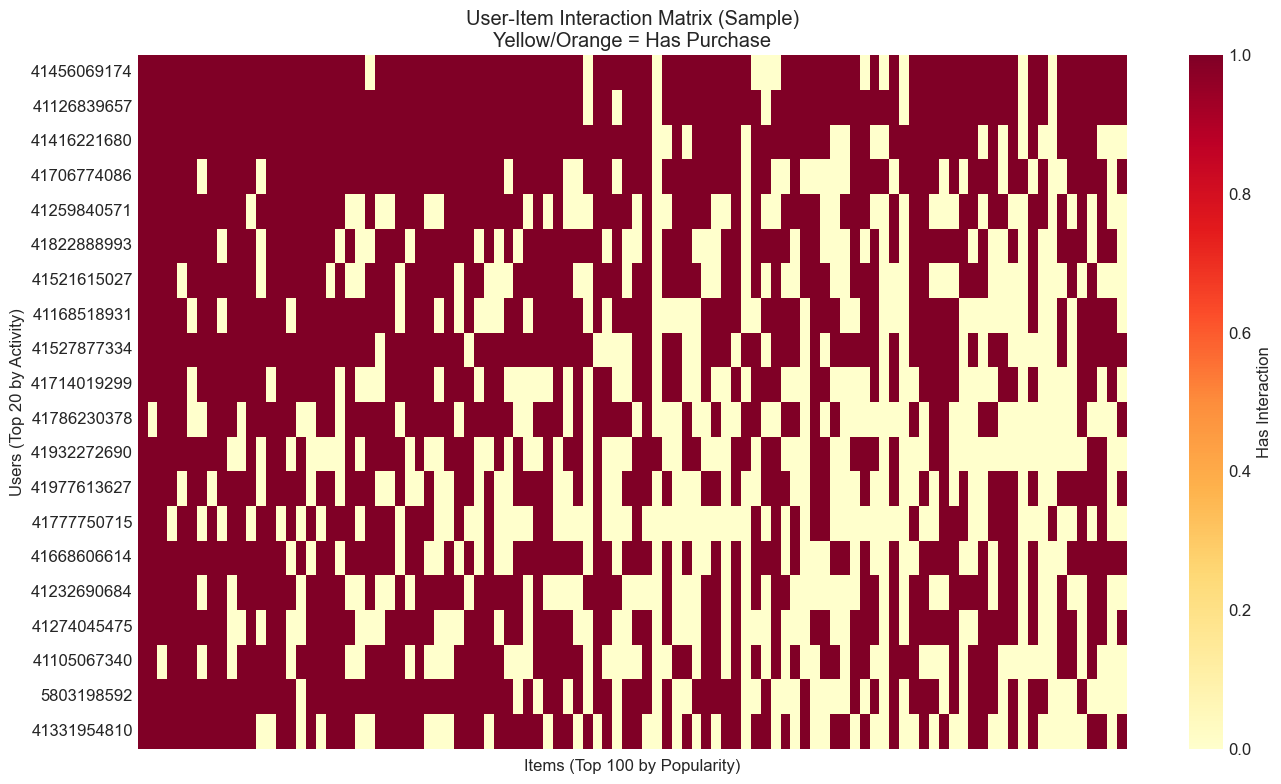

In [20]:
# Visualize user-item interaction matrix (sample)
# Create interaction matrix for loyal customers (sampled for visualization)
loyal_matrix = loyal_df.groupby(['user_id', 'item_id']).size().unstack(fill_value=0)

# Sample for visualization (top users and top items)
top_users = loyal_df.groupby('user_id').size().nlargest(20).index
top_items = loyal_df.groupby('item_id').size().nlargest(100).index

sample_matrix = loyal_matrix.loc[top_users, top_items]

fig, ax = plt.subplots(figsize=(14, 8))
sns.heatmap(sample_matrix > 0, cmap='YlOrRd', cbar_kws={'label': 'Has Interaction'}, ax=ax)
ax.set_xlabel('Items (Top 100 by Popularity)')
ax.set_ylabel('Users (Top 20 by Activity)')
ax.set_title('User-Item Interaction Matrix (Sample)\nYellow/Orange = Has Purchase')
ax.set_xticklabels([])
plt.tight_layout()
plt.show()

## 9. Recommendations for Model Selection

In [21]:
# Summary and Recommendations
print('=' * 80)
print('DATA ANALYSIS SUMMARY & MODEL RECOMMENDATIONS')
print('=' * 80)

print('\n1. DATA CHARACTERISTICS:')
print(f'   - Loyal Customers: {loyal_df["user_id"].nunique()} users, {loyal_df["item_id"].nunique()} items')
print(f'   - New Customers: {new_df["user_id"].nunique()} users, {new_df["item_id"].nunique()} items')
print(f'   - Item Overlap: {len(common_items)} items ({len(common_items)/len(new_items)*100:.1f}% of new customer items)')
print(f'   - Loyal Sparsity: {loyal_sparsity["sparsity"]*100:.2f}%')
print(f'   - New Sparsity: {new_sparsity["sparsity"]*100:.2f}%')

print('\n2. KEY INSIGHTS:')
print('   - Long-tail distribution: Few items account for most purchases')
print('   - High user engagement: Loyal users have substantial history (avg 1000+ items)')
print('   - Strong co-purchase patterns: Items frequently bought together')
print('   - Price sensitivity: Most items in $2-5 range')

print('\n3. RECOMMENDED MODELS:')
print('   ')
print('   FOR LOYAL CUSTOMERS:')
print('   - Primary: Item-Item Collaborative Filtering (proven, scalable)')
print('   - Secondary: Matrix Factorization (ALS for implicit feedback)')
print('   - Rationale: Rich user history enables personalized CF')
print('   ')
print('   FOR NEW CUSTOMERS (Cold Start):')
print('   - Popularity-based: Trending/bestselling items')
print('   - Price-segment matching: Recommend within user\'s price range')
print('   - Item similarity: If any interaction, use similar items')
print('   - Hybrid: Combine above for diversity')

print('\n4. TECHNICAL CONSIDERATIONS:')
print('   - Precompute item similarities offline for fast serving')
print('   - Use time-weighted interactions (recent = more relevant)')
print('   - Cache popular item lists for cold-start fallback')
print('   - Target latency: <100ms for real-time recommendations')

DATA ANALYSIS SUMMARY & MODEL RECOMMENDATIONS

1. DATA CHARACTERISTICS:
   - Loyal Customers: 70 users, 10148 items
   - New Customers: 50 users, 1997 items
   - Item Overlap: 1649 items (82.6% of new customer items)
   - Loyal Sparsity: 95.51%
   - New Sparsity: 96.78%

2. KEY INSIGHTS:
   - Long-tail distribution: Few items account for most purchases
   - High user engagement: Loyal users have substantial history (avg 1000+ items)
   - Strong co-purchase patterns: Items frequently bought together
   - Price sensitivity: Most items in $2-5 range

3. RECOMMENDED MODELS:
   
   FOR LOYAL CUSTOMERS:
   - Primary: Item-Item Collaborative Filtering (proven, scalable)
   - Secondary: Matrix Factorization (ALS for implicit feedback)
   - Rationale: Rich user history enables personalized CF
   
   FOR NEW CUSTOMERS (Cold Start):
   - Popularity-based: Trending/bestselling items
   - Price-segment matching: Recommend within user's price range
   - Item similarity: If any interaction, use simil

In [22]:
# Save processed data for model training
print('\nSaving processed data for model training...')

# Combine datasets with user type flag
loyal_df['user_type'] = 'loyal'
new_df['user_type'] = 'new'

# Save to CSV
loyal_df.to_csv('../data/loyal_customers_processed.csv', index=False)
new_df.to_csv('../data/new_customers_processed.csv', index=False)

# Save item popularity for cold-start
loyal_item_popularity.to_csv('../data/item_popularity.csv')

print('Data saved successfully!')
print('  - ../data/loyal_customers_processed.csv')
print('  - ../data/new_customers_processed.csv')
print('  - ../data/item_popularity.csv')


Saving processed data for model training...
Data saved successfully!
  - ../data/loyal_customers_processed.csv
  - ../data/new_customers_processed.csv
  - ../data/item_popularity.csv


---
## End of Data Analysis

This notebook has provided comprehensive analysis of the product recommendation dataset. Key findings:

1. **User Segments**: Clear distinction between loyal (70 users with rich history) and new customers (50 users with limited data)
2. **Item Distribution**: Long-tail pattern with few items dominating purchases
3. **Co-purchase Patterns**: Strong associations between items bought together
4. **Price Distribution**: Most items in low-mid price range ($2-5)

The recommended approach combines Item-Item CF for loyal users with a hybrid cold-start strategy for new users.